In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("pima-indians-diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabities,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabities,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Diabities      768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Checking Null Value
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Diabities        0
Age              0
Outcome          0
dtype: int64

In [10]:
# Checking Duplicate Value
df.duplicated().sum()

0

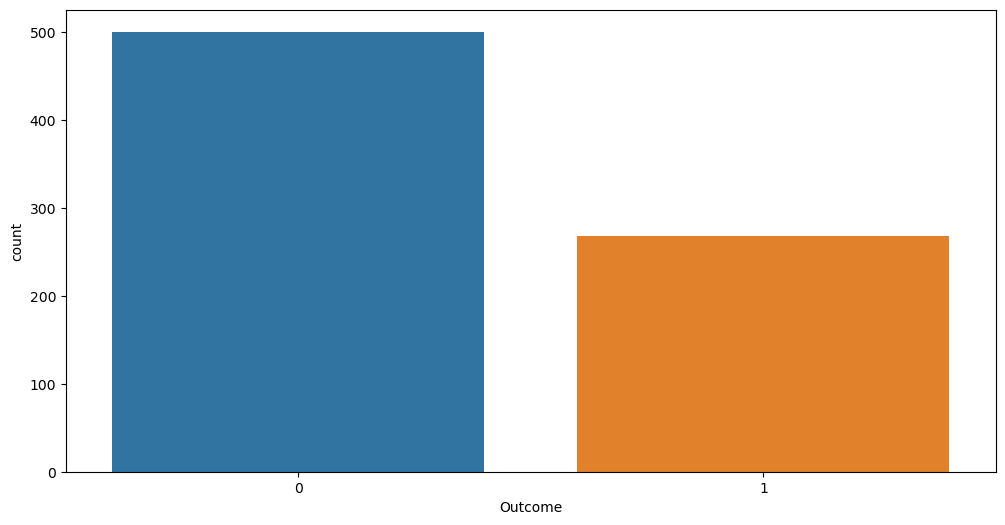

In [11]:
# Data Visualization
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=df)
plt.show()

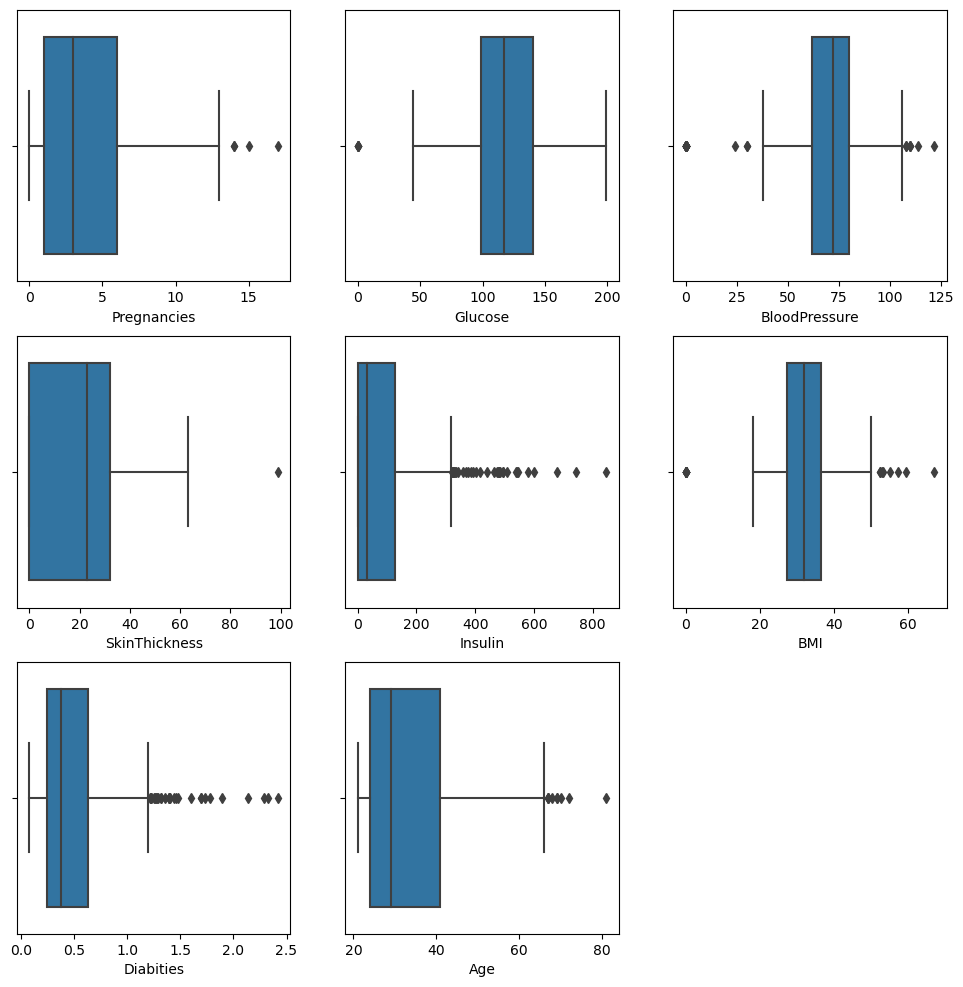

In [12]:
# Observing Outliers
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabities','Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= col, data=df)
    
plt.show()

C:\Users\Amuthavel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


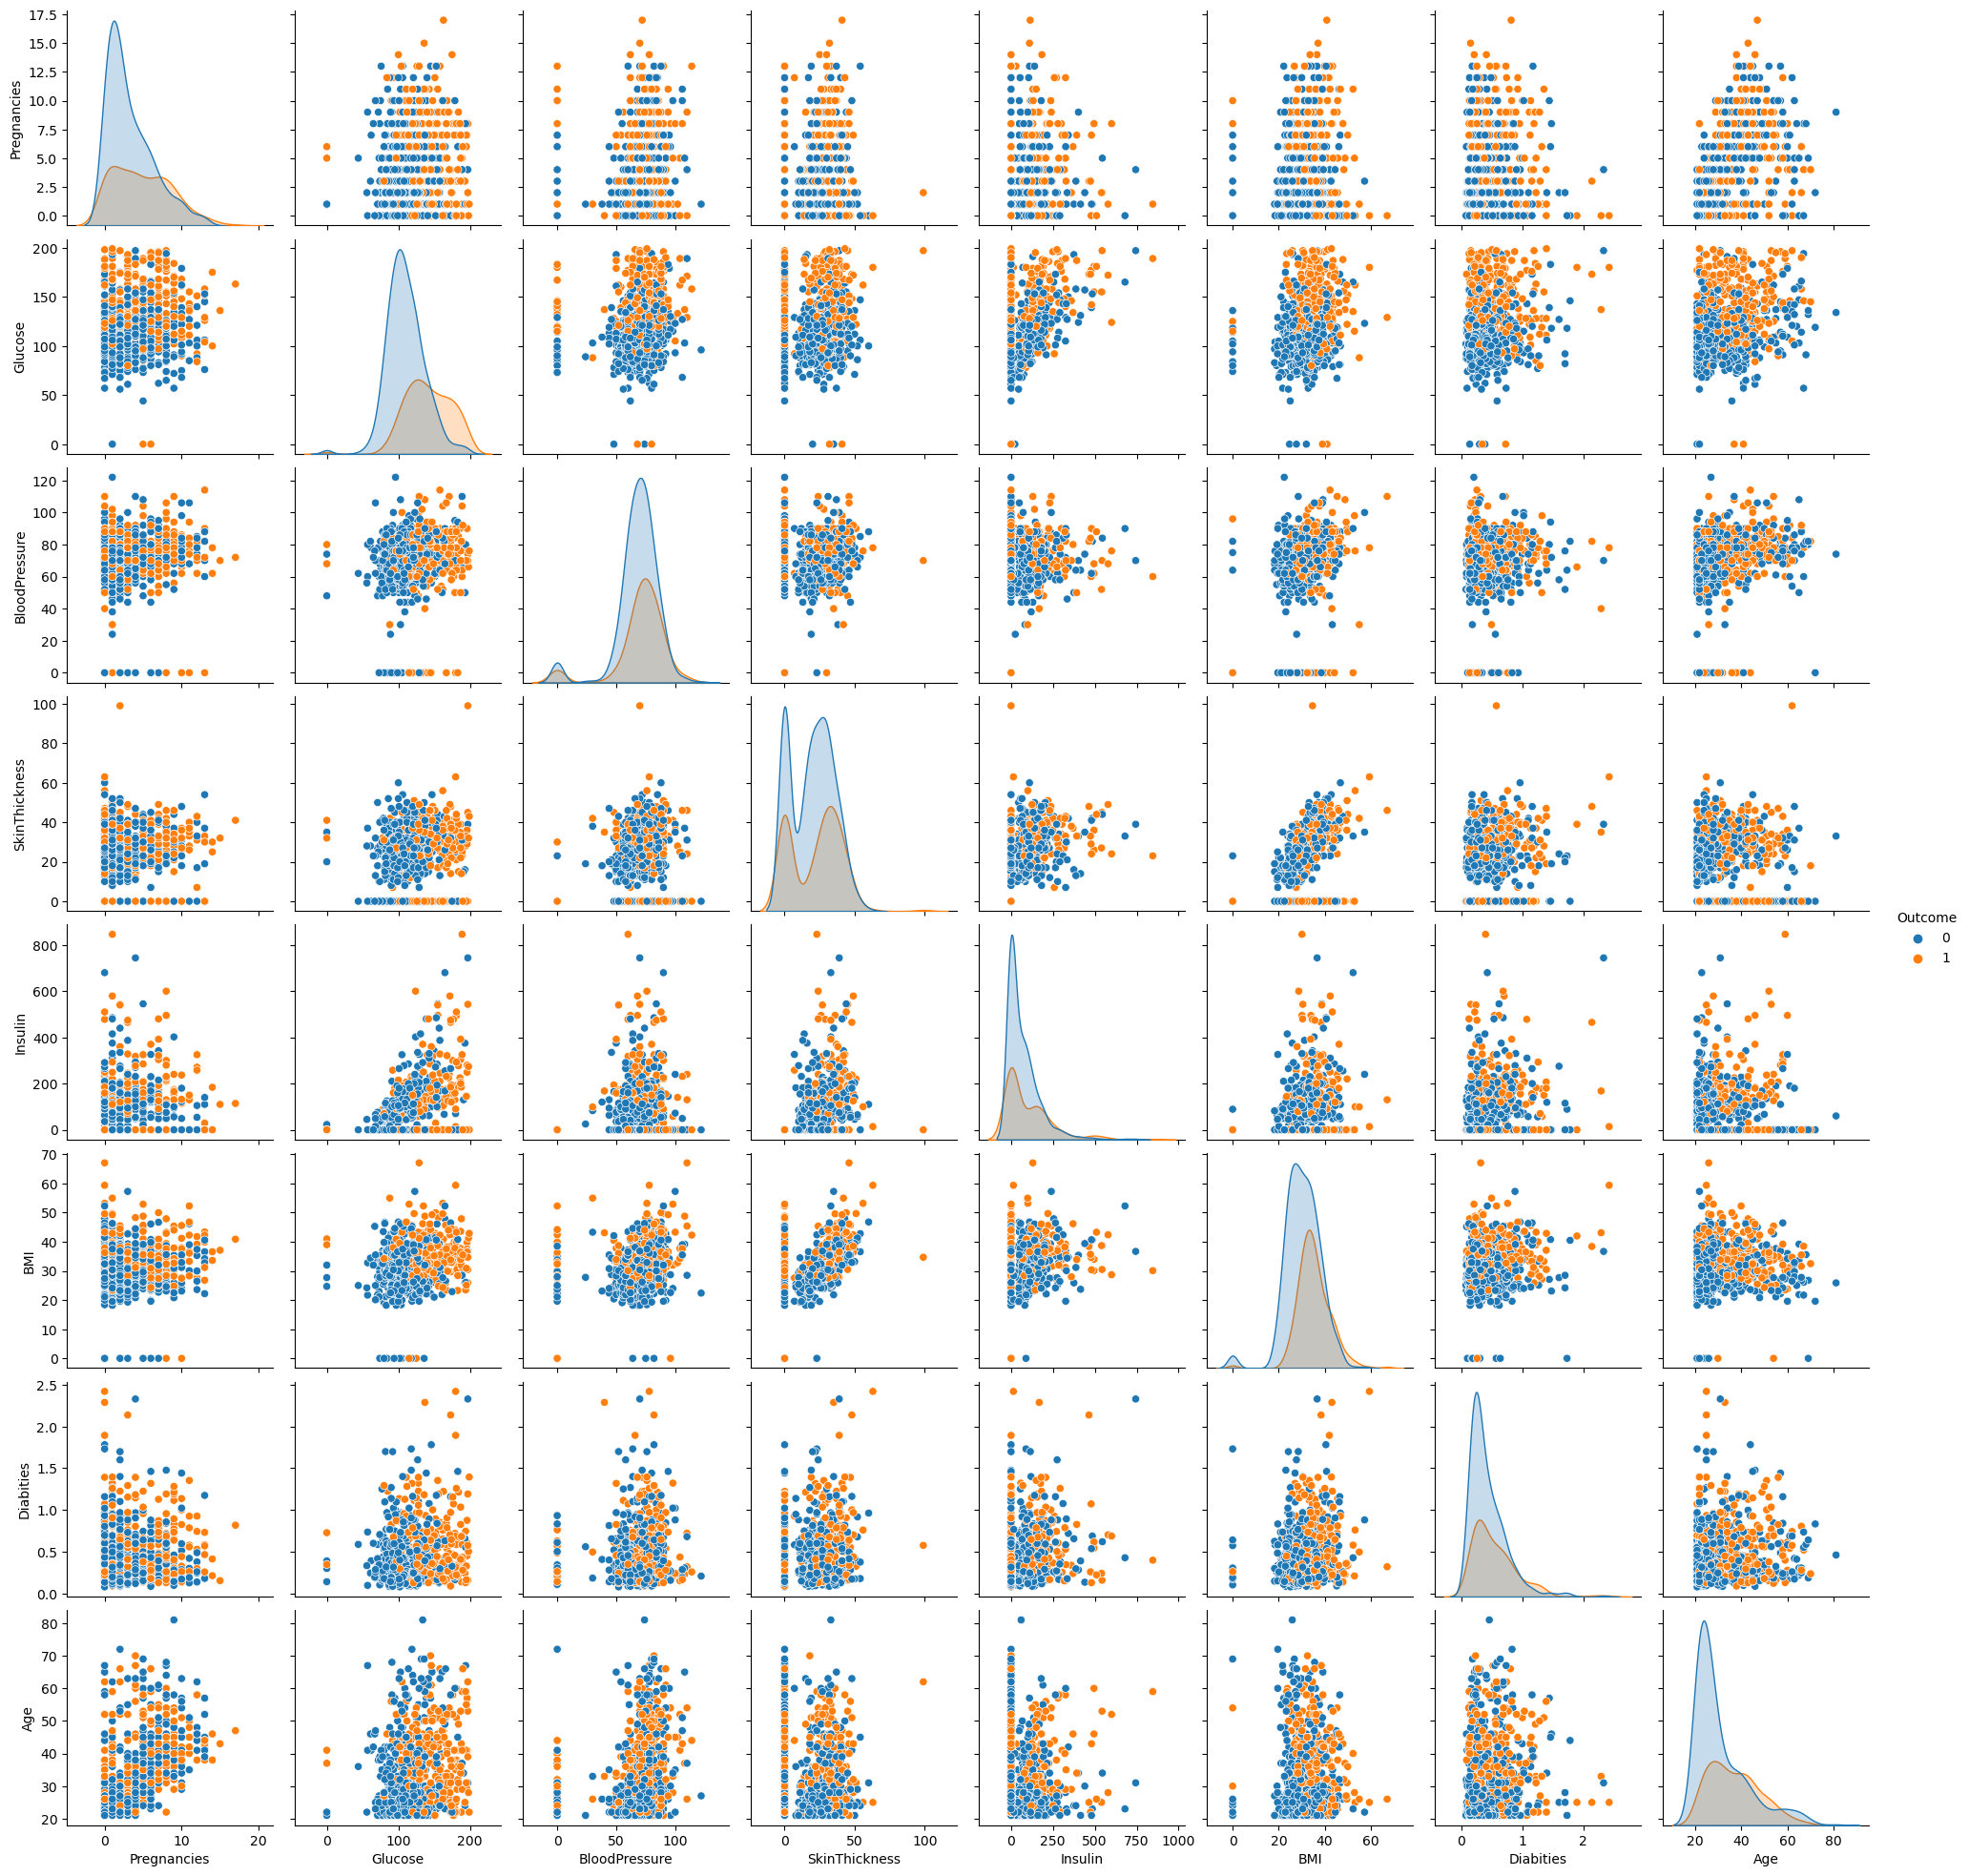

In [16]:
# Pair plot is used to find relationship
sns.pairplot(df, hue='Outcome')
plt.show()

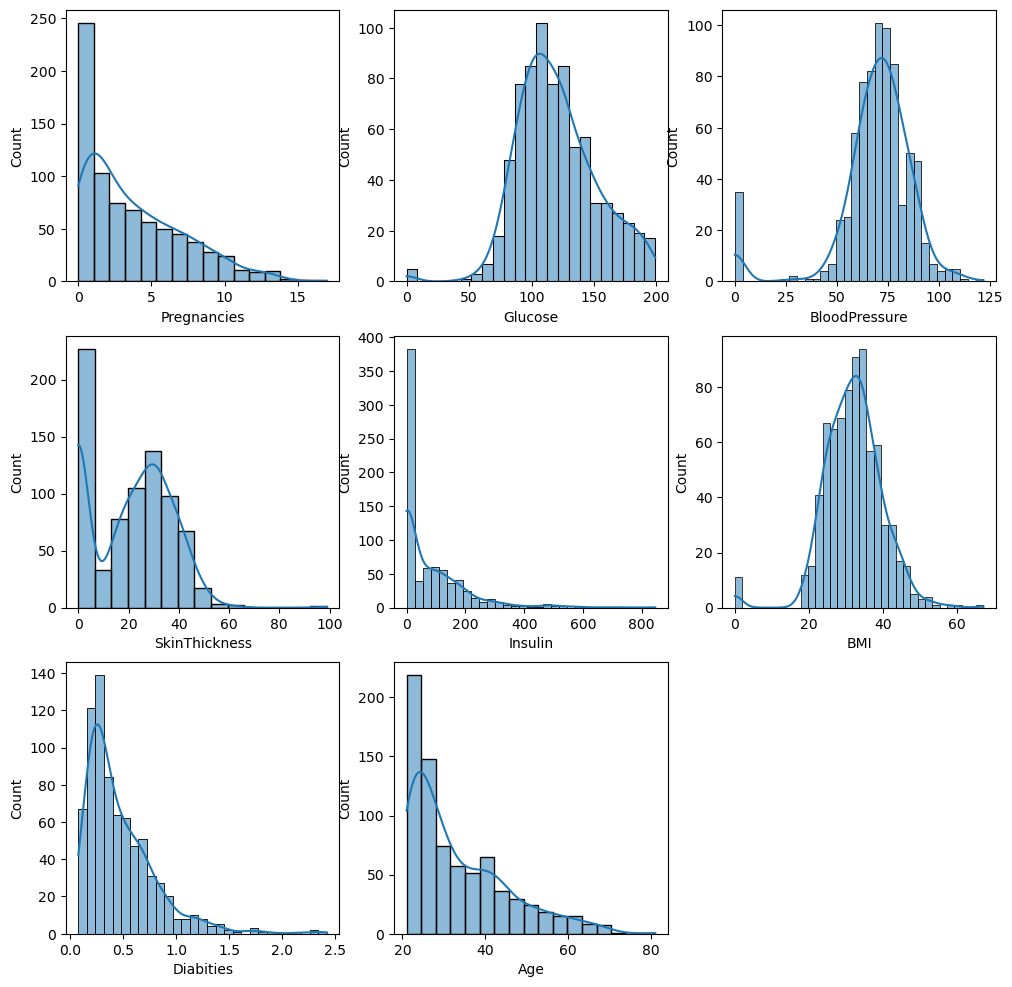

In [17]:
#KDE --> Kernal density equation
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabities','Age']):
    plt.subplot(3,3,i+1)
    sns.histplot(x= col, data=df,kde=True)
    
plt.show()

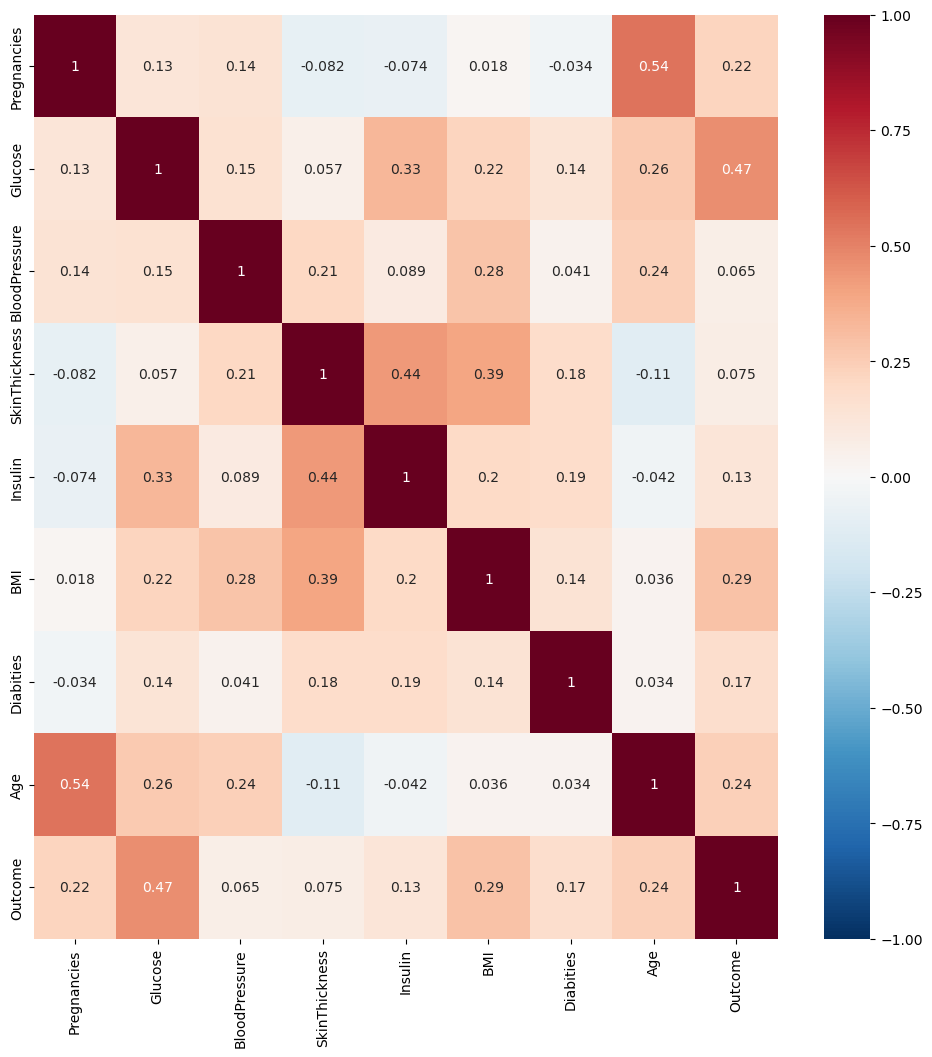

In [19]:
# Correlation
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), vmin=-1.0, center=0, cmap='RdBu_r', annot=True)
plt.show()

In [20]:
# Standard Scaling And Label Encoding
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(df.drop(['Outcome'],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabities','Age'])

In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabities,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [22]:
Y= df['Outcome']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3, random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

test_scores=[]
train_scores=[]

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [30]:
max_train_score = max(train_scores)
train_scores_index= [i for i, v in enumerate(train_scores) if v==max_train_score]
print("Max_train_score",max_train_score*100)
print("Indices of max_train_score:", train_scores_index)

Max_train_score 100.0
Indices of max_train_score: [0]


In [31]:
max_test_score = max(test_scores)
test_scores_index= [i for i, v in enumerate(test_scores) if v==max_test_score]
print("Max_test_score",max_test_score*100)
print("Indices of max_test_score:", test_scores_index)

Max_test_score 77.92207792207793
Indices of max_test_score: [12]


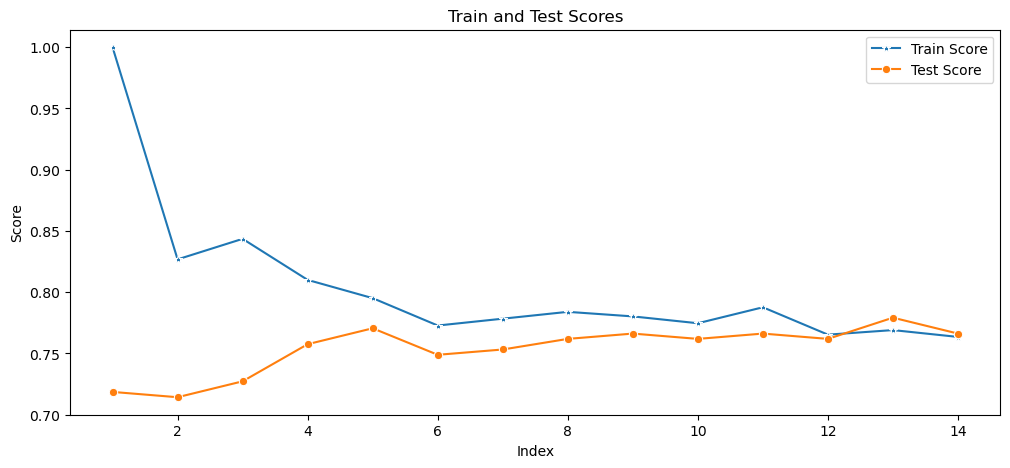

In [34]:
# Assuming train_scores and test_scores are defined and are lists or arrays of scores
plt.figure(figsize=(12, 5))

# Plot train scores
sns.lineplot(x=range(1, len(train_scores) + 1), y=train_scores, marker='*', label='Train Score')

# Plot test scores
sns.lineplot(x=range(1, len(test_scores) + 1), y=test_scores, marker='o', label='Test Score')

plt.xlabel('Index')  # Label for the x-axis
plt.ylabel('Score')  # Label for the y-axis
plt.title('Train and Test Scores')  # Title of the plot
plt.legend()  # Display the legend
plt.show()

In [35]:
knn =KNeighborsClassifier(13)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.7792207792207793

In [36]:
from sklearn.metrics import confusion_matrix
Y_pred =knn.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[141,  16],
       [ 35,  39]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

